In [107]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
from detectron2.config import get_cfg
from detectron2 import model_zoo
import os, json, cv2, random, shutil
from detectron2.engine import DefaultPredictor
from skimage.morphology import thin
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import Visualizer
""" https://github.com/mameng1/split-coco-datasets/blob/master/pycocoDemo.ipynb
    https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5#scrollTo=Ya5nEuMELeq8
"""

ModuleNotFoundError: No module named 'google.colab'

In [11]:
dataDir='./Dataset'
dataType='test'
annFile='{}/{}.json'.format(dataDir,dataType)

# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [13]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
diente raiz

COCO supercategories: 
diente


In [41]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['diente','raiz']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [5])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

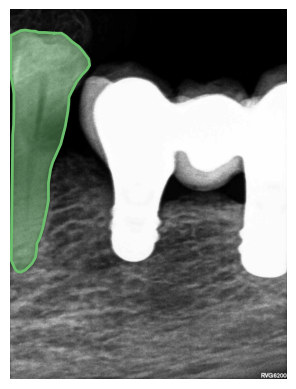

In [42]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(dataDir+"/data/"+img["file_name"])
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [85]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join("output/", "model_final_2det.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)
"""
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 25000
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2
cfg.TEST.DTECTIONS_PER_IMAGE = 25
cfg.MODEL.WEIGHTS = os.path.join("output/", "model_final_2det.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.50
"""

'\ncfg = get_cfg()\ncfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))\ncfg.DATALOADER.NUM_WORKERS = 2\ncfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")\ncfg.SOLVER.IMS_PER_BATCH = 2\ncfg.SOLVER.BASE_LR = 0.00025\ncfg.SOLVER.MAX_ITER = 25000\ncfg.MODEL.ROI_HEADS.NUM_CLASSES = 2\ncfg.TEST.DTECTIONS_PER_IMAGE = 25\ncfg.MODEL.WEIGHTS = os.path.join("output/", "model_final_2det.pth")\ncfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.50\n'

In [ ]:
register_coco_instances("dataset_test", {}, "Dataset/test.json", "Dataset/data")


AssertionError: Dataset 'dataset_test' is already registered!

In [103]:
test_metadata=MetadataCatalog.get("dataset_test")

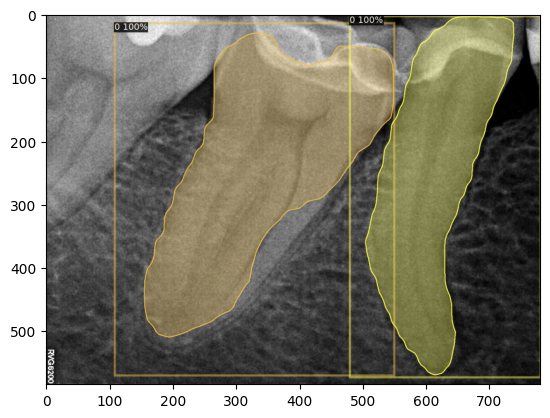

In [110]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread(dataDir+"/data/1A.jpg")
outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
v = Visualizer(im[:, :, ::-1],
               metadata=test_metadata, 
               scale=0.5, 
               instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])

In [ ]:
predicciones = predictor(I)

In [81]:
capa = predicciones["instances"].pred_masks.to("cpu").numpy()[0]

In [83]:
capa_thin=thin(capa)

In [ ]:
capa_thin